## 1.데이터 준비하기

##### https://www.youtube.com/watch?v=xsSJwCkh6po

### 패키지 설치 및 임포트

In [ ]:
!pip install konlpy
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import konlpy

import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
youtube_df = pd.read_csv('/content/사나고댓글_크롤링_20240709.csv')
youtube_df

,댓글 내용
0,30년전 캐릭터치고 진짜 촌시럽지않게 심플하게 잘 만든들
1,평온함이 주는 즐거움이라는 말이 너무 좋아요. 전 대전에서 태어나 살면서 노잼도시라...
2,진짜 대단... 만드는거 지루해서 잘 안 보는데 사나고님 영상은 못 지나침.. 정교...
3,헉 정말 꿈돌이는 너무 귀여운 것 같아요! 진짜 30살이라는 것이 믿기지가 않네요!...
4,대전인으로서 반가운 꿈돌이..️
...,...
1043,역기 노..잼...도....ㅅ
1044,솔직히 재미없어 대전 대전 사람이 인정합니다
1045,대전에 카이스트랑 성심당 말고 뭐가있냐곸ㅋㅋㅋㅋㅋㅋㅋㅈ노잼 도시 대전으로 여행안간다...
1046,대전이 왜 노잼 도시인지 모름


## 2.단어분석

In [ ]:
okt = konlpy.tag.Okt()
word_df = pd.DataFrame({'word' : okt.nouns(' '.join(li for li in youtube_df['댓글 내용'].astype(str)))})
word_df

,word
0,캐릭터
1,진짜
2,촌
3,시럽
4,심플
...,...
5573,하나
5574,당신
5575,회사
5576,형편


In [ ]:
word_df['count'] = word_df['word'].str.len()
word_df

,word,count
0,캐릭터,3
1,진짜,2
2,촌,1
3,시럽,2
4,심플,2
...,...,...
5573,하나,2
5574,당신,2
5575,회사,2
5576,형편,2


### 단어 집계표 만들기

In [ ]:
group_df = word_df.groupby('word', as_index=False).agg(n=('word', 'count')).sort_values('n', ascending=False)
group_df

,word,n
270,꿈돌이,331
408,대전,245
812,사나,188
105,고,105
1119,영상,69
...,...,...
735,벽,1
734,베이,1
731,벌,1
730,번창,1


### 단어 집계 결과 시각화

In [ ]:
px.bar(group_df.head(20), x='word', y='n', text_auto=True)

## 3.워드클라우드 시각화

### 명사 집계표를 활용한 워드 클라우드 시각화

In [ ]:
dic_word = group_df.set_index('word').to_dict()['n']
dic_word

{'꿈돌이': 331,
 '대전': 245,
 '사나': 188,
 '고': 105,
 '영상': 69,
 '때': 68,
 '성심당': 52,
 '도시': 50,
 '펜': 45,
 '진짜': 43,
 '엑스포': 42,
 '사람': 40,
 '노잼': 40,
 '카페': 34,
 '저': 34,
 '나': 33,
 '추억': 30,
 '정말': 28,
 '형': 27,
 '거': 26,
 '살': 26,
 '보고': 26,
 '왜': 25,
 '이': 25,
 '다음': 23,
 '기억': 23,
 '아파트': 22,
 '인형': 22,
 '꿈': 22,
 '마스코트': 21,
 '랜드': 21,
 '요': 21,
 '지금': 21,
 '캐릭터': 20,
 '것': 19,
 '생각': 19,
 '내': 19,
 '더': 18,
 '곳': 17,
 '그': 17,
 '이제': 17,
 '팔이': 17,
 '유잼': 16,
 '여행': 16,
 '안유진': 16,
 '집': 15,
 '가면': 15,
 '머리': 15,
 '필라멘트': 15,
 '처음': 15,
 '혹시': 14,
 '작품': 14,
 '꼭': 14,
 '수': 14,
 '뼈대': 14,
 '커비': 14,
 '요즘': 13,
 '옛날': 13,
 '한번': 13,
 '제': 13,
 '손': 13,
 '줄': 13,
 '피': 13,
 '개': 12,
 '전': 12,
 '팬': 12,
 '살이': 12,
 '소풍': 12,
 '규어': 12,
 '한빛탑': 12,
 '항상': 11,
 '뭐': 11,
 '꿈순이': 11,
 '자랑': 11,
 '유튜버': 11,
 '좀': 11,
 '모습': 10,
 '말': 10,
 '만들기': 10,
 '발': 10,
 '얼굴': 10,
 '하나': 10,
 '별': 10,
 '당시': 10,
 '제발': 10,
 '학년': 10,
 '홍보': 10,
 '안': 10,
 '빵': 9,
 '다시': 9,
 '도': 9,
 '살기': 9,
 '점': 9,


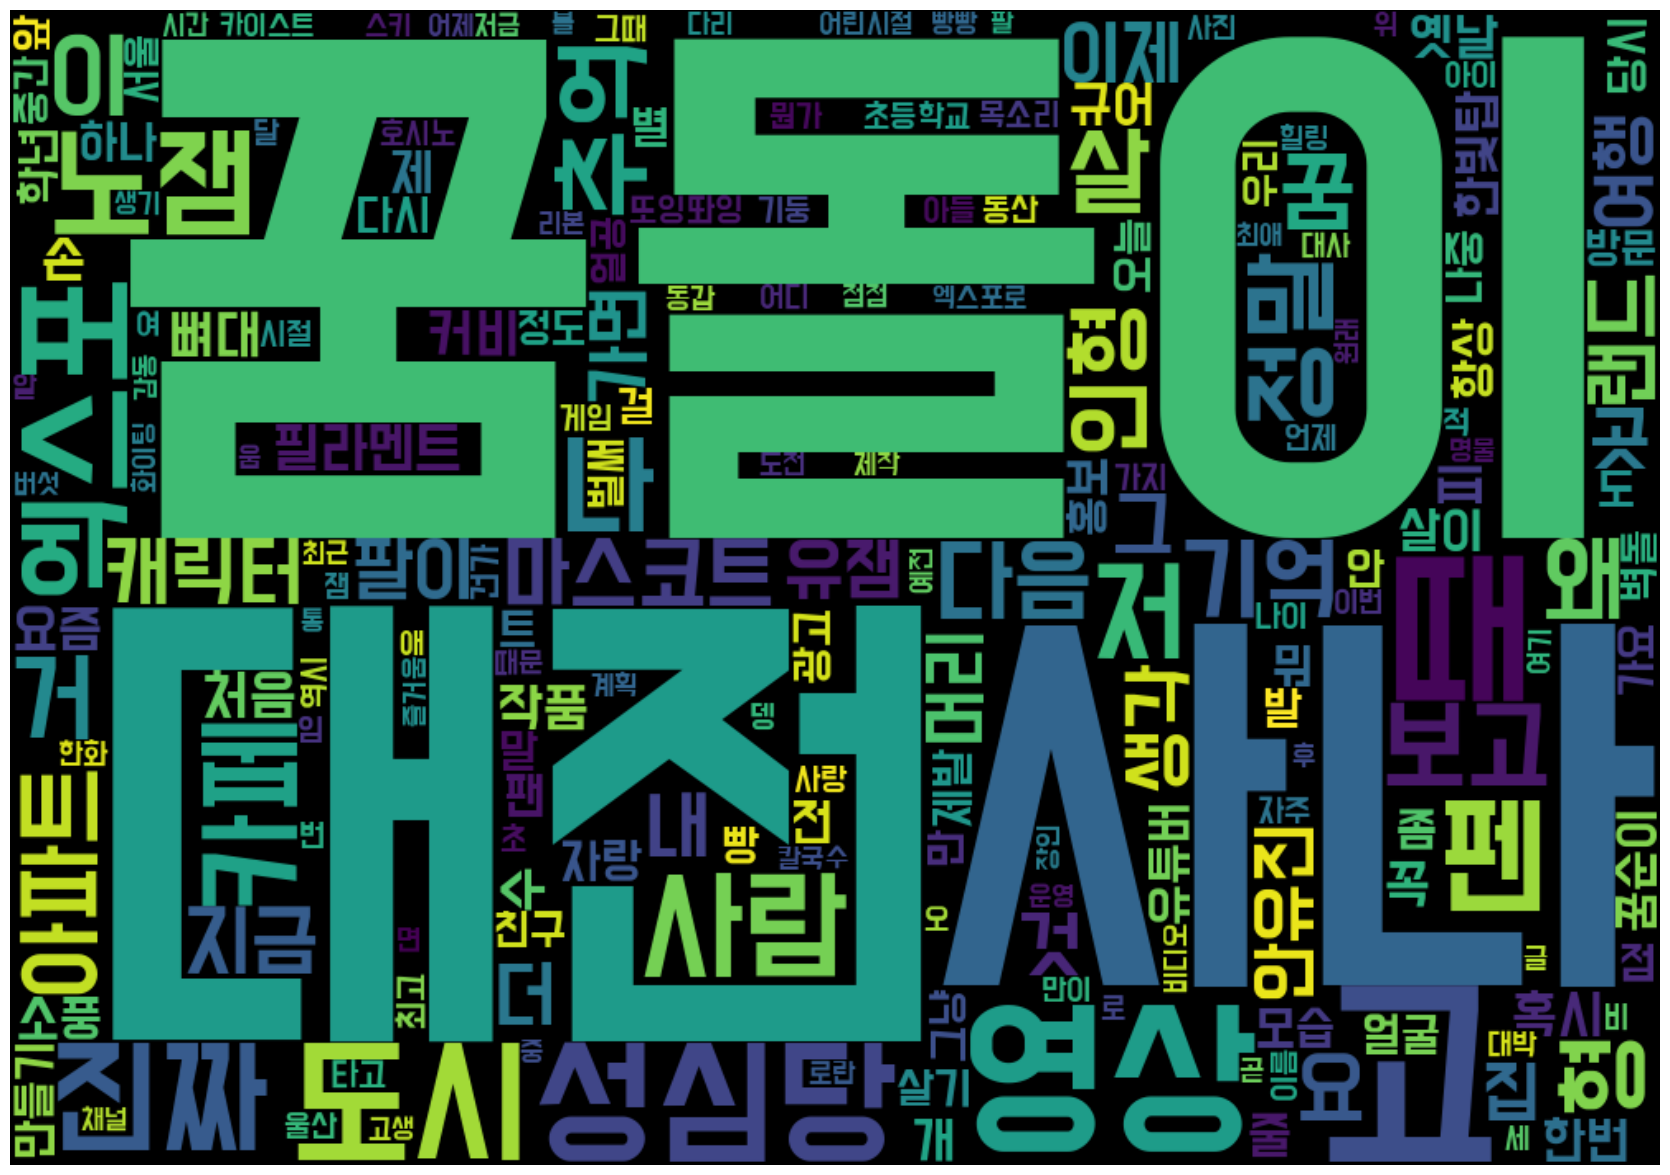

In [ ]:
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, font_path=font_path).generate_from_frequencies(dic_word)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

### 마스킹을 활용한 워드 클라우드 시각화

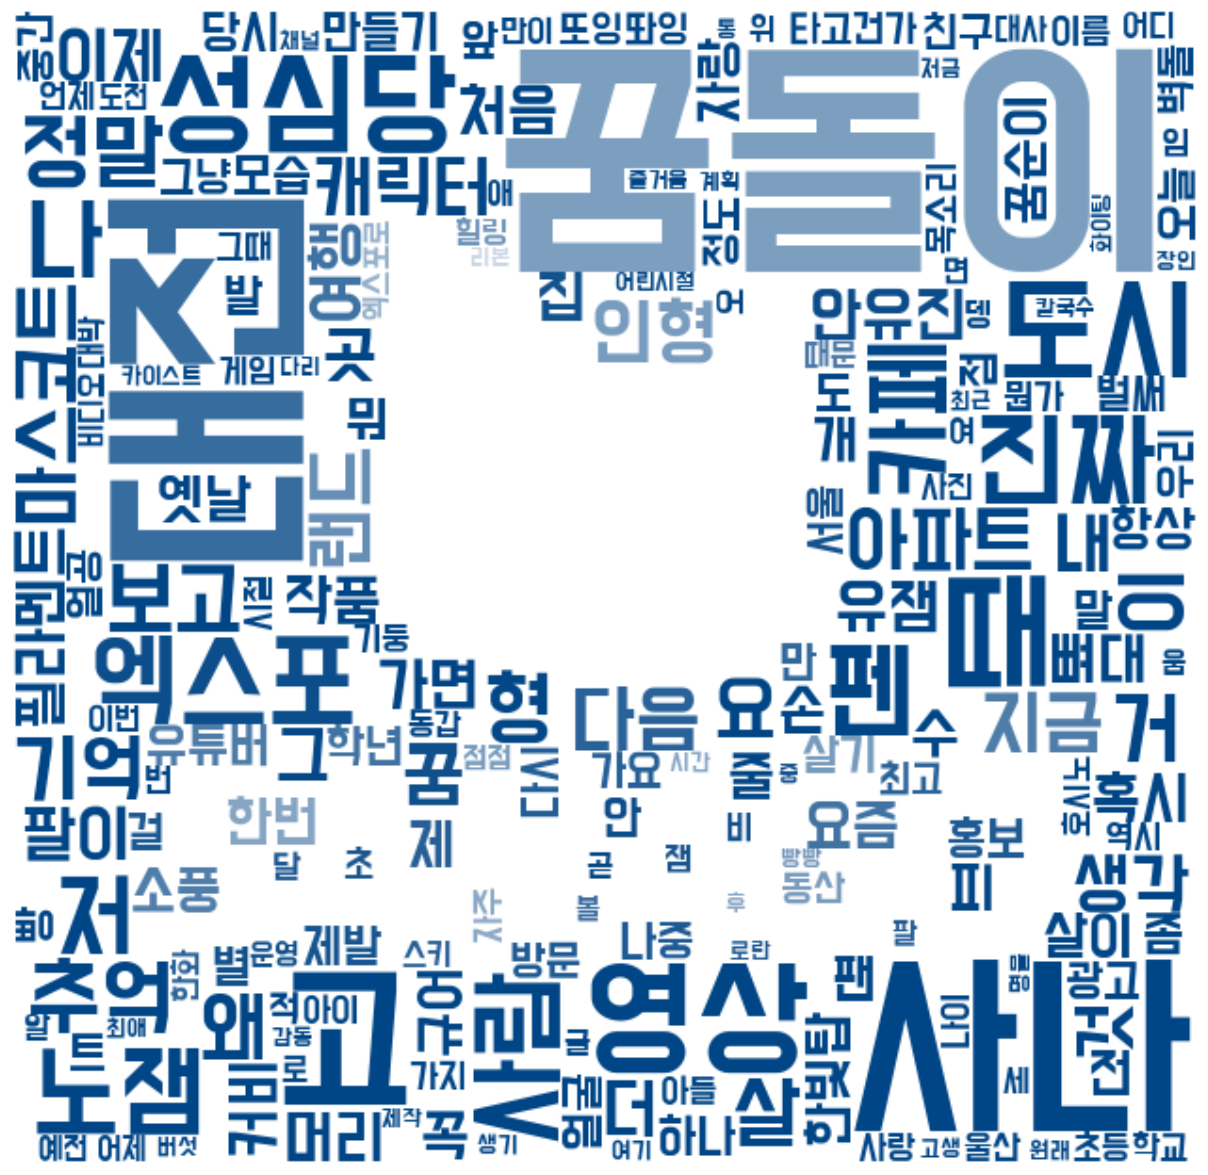

In [ ]:
icon = Image.open('/content/sanago.png')
harry_mask = np.array(icon)

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, background_color='white', font_path=font_path, mask=harry_mask).generate_from_frequencies(dic_word)

plt.axis('off')
img_colors = ImageColorGenerator(harry_mask, default_color=(255,255,255))
wc = wc.recolor(color_func=img_colors)
plt.imshow(wc, interpolation='bilinear')
plt.show()

### 이미지 결과 저장

In [ ]:
wc.to_file(filename='sanago_wordcloud.png')
print('이미지 저장 완료')

이미지 저장 완료


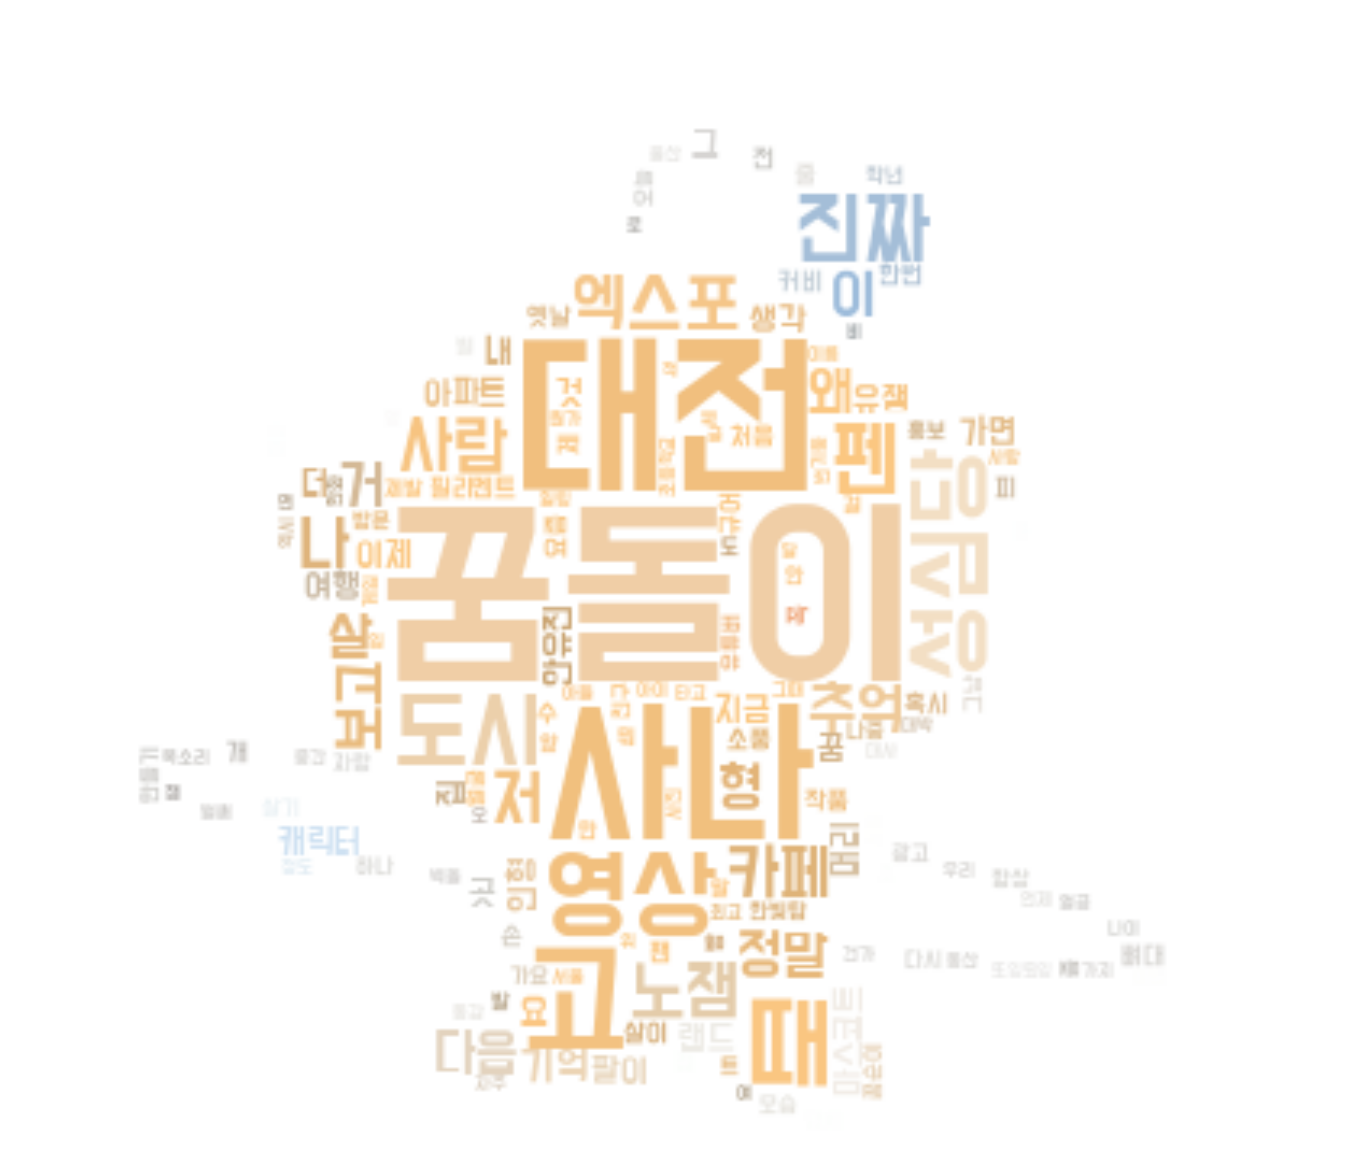

In [ ]:
icon = Image.open('/content/testimg1.jpeg')
harry_mask = np.array(icon)

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, background_color='white', font_path=font_path, mask=harry_mask).generate_from_frequencies(dic_word)

plt.axis('off')
img_colors = ImageColorGenerator(harry_mask, default_color=(255,255,255))
wc = wc.recolor(color_func=img_colors)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [18]:
wc.to_file(filename='sanago2_wordcloud.png')
print('이미지 저장 완료')

이미지 저장 완료
